## FWHM Size

***

### Authors:

   * Andrés Felipe Duque Bran

   * Melih Aktas

In [19]:
import matplotlib.pyplot as plt
import numpy as np

X = np.logspace(-5, 4, 90)
Y = np.linspace(-90,1e+12, 180) # for greys
# Functions
# CMB
def CMB(f,A):
    kB = 1.380649 * (10 ** -23)
    h = 6.62607015 * (10 ** -34)
    xx = (h * 10**(+9) * f ) / (kB * 2.7255)
    g = (np.exp(xx) - 1)**(2) / ((xx)**(2)* np.exp(xx))
    return A/g

# Free-free
def free(f, EM, Te):
    gff = np.log(np.exp(5.960-( np.sqrt(3) / np.pi ) * np.log(f*Te**(-3/2)*10**6)) + np.exp(1))
    tau = 0.05468 * Te**(-3/2)*f**(-2)*EM*gff
    sff = 10**(6)*Te*(1-np.exp(-tau))
    return sff

# SZ
def SZ(f, ysz):
    kB = 1.380649 * (10 ** -23)
    h = 6.62607015 * (10 ** -34)
    xx = (h * 10**(+9) * f ) / (kB * 2.7255)
    g = (np.exp(xx) - 1)**(2) / ((xx)**(2)* np.exp(xx))
    ssz = 1e+6 * ysz / g * 2.7255 * ((xx*(np.exp(xx)+1))/(np.exp(xx)-1) - 4)
    return ssz

# Dust
def Dust(f, Bd, Td):
    Ad = 100
    f0 = 545
    kB = 1.380649 * (10 ** -23)
    h = 6.62607015 * (10 ** -34)
    gamma = h / (kB * Td) * (10 ** 9)
    return Ad * ((f/f0) ** (Bd+1)) * ((np.exp(gamma*f0)-1)/(np.exp(gamma*f)-1))

# Synch
def Synchrotron(f, a):
    if (a == 0.1):
        return 2200000 * pow(f, -3.11)
    elif (a == 1):
        return 2747547.1 * pow(f, -3.11)
    elif (a == 10):
        return 9041403.8 * pow(f, -3.11)

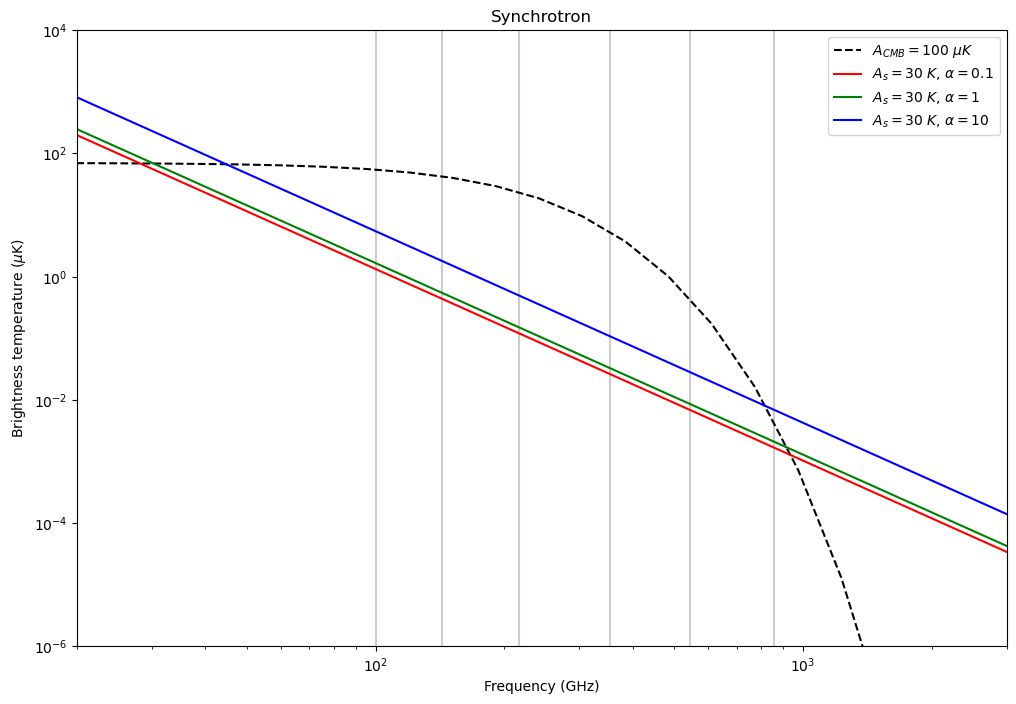

In [38]:
# Sync
figure, axis = plt.subplots(1,1)
figure.set_size_inches(12, 8, forward=True)
HF = np.array([100, 143, 217, 353, 545, 857])
for f in HF:
    axis.loglog(f*np.ones(180), Y, color='k', alpha = 0.2)

axis.loglog(X, CMB(X, 70), color='k', linestyle='dashed', label=r'$A_{CMB}=100$ $\mu K$')
axis.loglog(X, Synchrotron(X, 0.1), color='r', label=r'$A_{s}=30$ $K$, $\alpha=0.1$')
axis.loglog(X, Synchrotron(X, 1), color='g', label=r'$A_{s}=30$ $K$, $\alpha=1$')
axis.loglog(X, Synchrotron(X, 10), color='b', label=r'$A_{s}=30$ $K$, $\alpha=10$')
axis.set_title("Synchrotron")
axis.set_xlabel("Frequency (GHz)")
axis.set_ylabel(r"Brightness temperature ($\mu$K)")
axis.set_xlim([20, 3000])
axis.set_ylim([1e-6, 1e+4])
axis.legend()
plt.show()

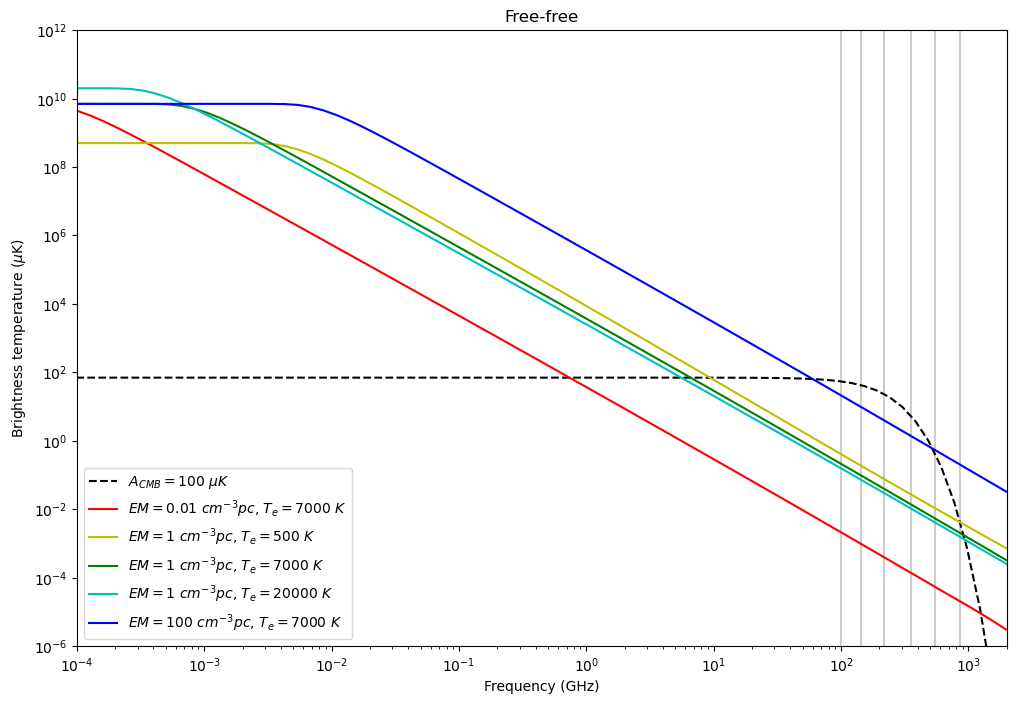

In [37]:
#Free-free
figure, axis = plt.subplots(1,1)
figure.set_size_inches(12, 8, forward=True)
HF = np.array([100, 143, 217, 353, 545, 857])
for f in HF:
    axis.loglog(f*np.ones(180), Y, color='k', alpha = 0.2)

axis.loglog(X, CMB(X, 70), color='k', linestyle='dashed', label=r'$A_{CMB}=100$ $\mu K$')
axis.loglog(X, free(X, 0.01, 7000), color='r', label=r'$EM=0.01$ $cm^{-3}pc$, $T_{e}=7000$ $K$')
axis.loglog(X, free(X, 1, 500), color='y', label=r'$EM=1$ $cm^{-3}pc$, $T_{e}=500$ $K$')
axis.loglog(X, free(X, 1, 7000), color='g', label=r'$EM=1$ $cm^{-3}pc$, $T_{e}=7000$ $K$')
axis.loglog(X, free(X, 1, 20000), color='c', label=r'$EM=1$ $cm^{-3}pc$, $T_{e}=20000$ $K$')
axis.loglog(X, free(X, 100, 7000), color='b', label=r'$EM=100$ $cm^{-3}pc$, $T_{e}=7000$ $K$')
axis.set_title("Free-free")
axis.set_xlabel("Frequency (GHz)")
axis.set_ylabel(r"Brightness temperature ($\mu$K)")
axis.set_xlim([1e-4, 2000])
axis.set_ylim([1e-6, 1e+12])
axis.legend()
plt.show()

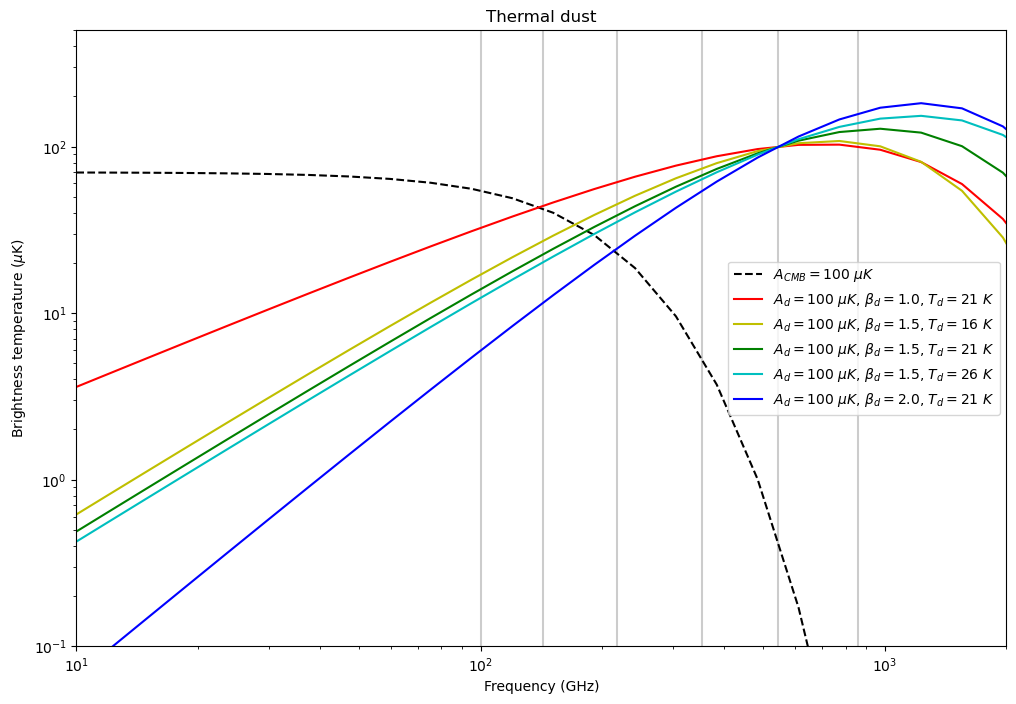

In [35]:
#Thermal Dust
figure, axis = plt.subplots(1,1)
figure.set_size_inches(12, 8, forward=True)
HF = np.array([100, 143, 217, 353, 545, 857])
for f in HF:
    axis.loglog(f*np.ones(180), Y, color='k', alpha = 0.2)

axis.loglog(X, CMB(X, 70), color='k', linestyle='dashed', label=r'$A_{CMB}=100$ $\mu K$')
axis.loglog(X, Dust(X, 1, 21), color='r', label=r'$A_{d}=100$ $\mu K$, $\beta_{d}=1.0$, $T_{d}=21$ $K$')
axis.loglog(X, Dust(X, 1.5, 16), color='y', label=r'$A_{d}=100$ $\mu K$, $\beta_{d}=1.5$, $T_{d}=16$ $K$')
axis.loglog(X, Dust(X, 1.5, 21), color='g', label=r'$A_{d}=100$ $\mu K$, $\beta_{d}=1.5$, $T_{d}=21$ $K$')
axis.loglog(X, Dust(X, 1.5, 26), color='c', label=r'$A_{d}=100$ $\mu K$, $\beta_{d}=1.5$, $T_{d}=26$ $K$')
axis.loglog(X, Dust(X, 2.0, 21), color='b', label=r'$A_{d}=100$ $\mu K$, $\beta_{d}=2.0$, $T_{d}=21$ $K$')
axis.set_title("Thermal dust")
axis.set_xlabel("Frequency (GHz)")
axis.set_ylabel(r"Brightness temperature ($\mu$K)")
axis.set_xlim([10, 2000])
axis.set_ylim([0.1, 500])
axis.legend()
plt.show()

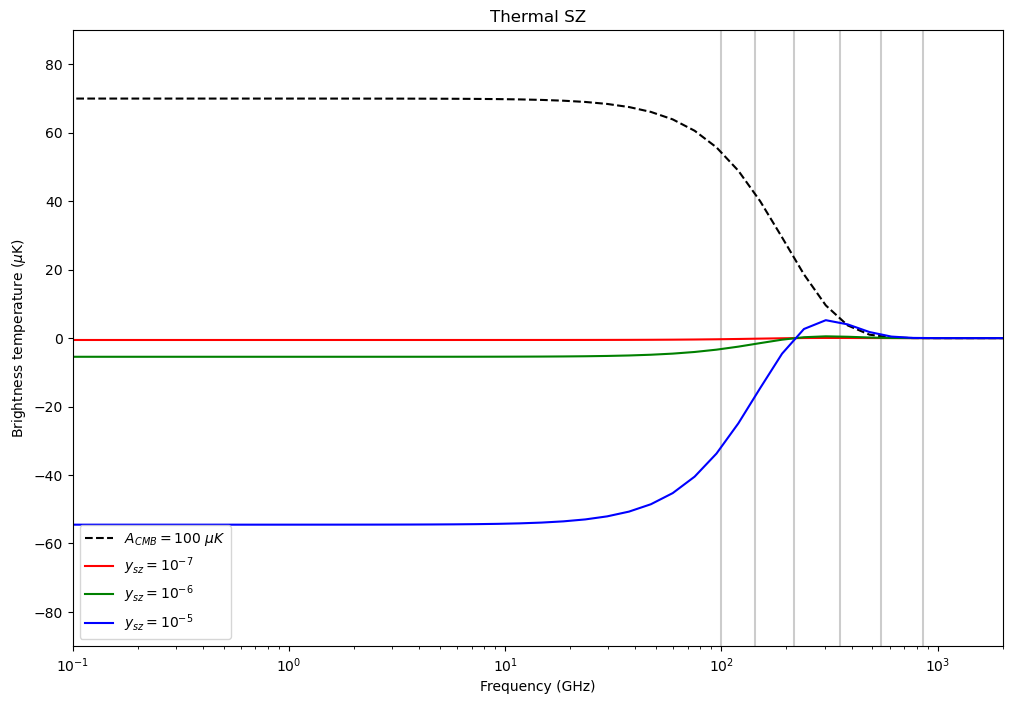

In [36]:
# Thermal SZ
figure, axis = plt.subplots(1,1)
figure.set_size_inches(12, 8, forward=True)
HF = np.array([100, 143, 217, 353, 545, 857])
for f in HF:
    axis.plot(f*np.ones(180), Y, color='k', alpha = 0.2)

axis.set_xscale("log")
axis.plot(X, CMB(X, 70), color='k', linestyle='dashed', label=r'$A_{CMB}=100$ $\mu K$')
axis.plot(X, SZ(X, 1e-7), color='r', label=r'$y_{sz}=10^{-7}$')
axis.plot(X, SZ(X, 1e-6), color='g', label=r'$y_{sz}=10^{-6}$')
axis.plot(X, SZ(X, 1e-5), color='b', label=r'$y_{sz}=10^{-5}$')
axis.set_title("Thermal SZ")
axis.set_xlabel("Frequency (GHz)")
axis.set_ylabel(r"Brightness temperature ($\mu$K)")
axis.set_xlim([0.1, 2000])
axis.set_ylim([-90, 90])
axis.legend()
plt.show()

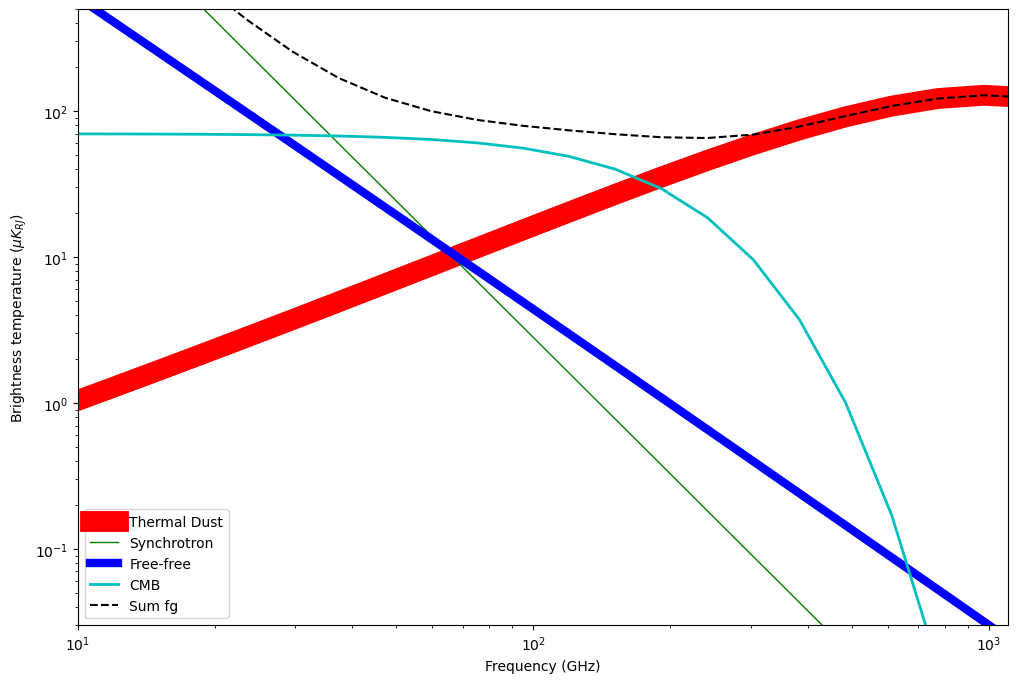

In [51]:
figure, axis = plt.subplots(1,1)
figure.set_size_inches(12, 8, forward=True)
def Dust_ave(f):
    return (Dust(f, 1, 21)+Dust(f, 1.5, 16)+Dust(f, 1.5, 21)+Dust(f, 1.5, 26)+Dust(f, 2.0, 21))/5
def Sync_ave(f):
    return (Synchrotron(f, 0.1)+Synchrotron(f, 1)+Synchrotron(f, 10))/3
def free_ave(f):
    return (free(f, 0.01, 7000)+free(f, 1, 500)+free(f, 1, 7000)+free(f, 1,20000)+free(f, 100,7000))/5


axis.loglog(X, Dust_ave(X), color='r', linewidth = '15', label='Thermal Dust')
axis.loglog(X, Sync_ave(X), color='g', linewidth = '1', label='Synchrotron')
axis.loglog(X, free_ave(X), color='b', linewidth = '6', label='Free-free')
axis.loglog(X, CMB(X, 70), color='c', linewidth = '2', label='CMB')
axis.loglog(X, CMB(X, 70)+free_ave(X)+Sync_ave(X)+Dust_ave(X), color='k', linestyle='dashed', label='Sum fg')

axis.set_xlabel("Frequency (GHz)")
axis.set_ylabel(r"Brightness temperature ($\mu K_{RJ}$)")
axis.set_xlim([10, 1100])
axis.set_ylim([0.03, 500])
axis.legend()
plt.show()